**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity 
BASE DIRECTORY (FD_BASE): /mount 
REPO DIRECTORY (FD_REPO): /mount/repo 
WORK DIRECTORY (FD_WORK): /mount/work 
DATA DIRECTORY (FD_DATA): /mount/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /mount/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /mount/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /mount/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /mount/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /mount/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /mount/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /mount/repo/Proj_ENCODE_FCC/log 
PROJECT APP     (FD_APP): /mount/repo/Proj_ENCODE_FCC/app 
PROJECT REF     (FD_REF): /mount/repo/Proj_ENCODE_FCC/references 



## Import data

In [2]:
txt_fdiry = file.path(
    FD_RES, 
    "region_nuc", 
    "fcc_astarr_macs"
)
txt_fname = "K562.hg38.ASTARR.macs.KS91.input.rep_all.max_overlaps.q5.bed.gz"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)

dat_region_nuc_import = dat
print(dim(dat))
head(dat)

[1] 150042     12


#1_usercol,2_usercol,3_usercol,4_pct_at,5_pct_gc,6_num_A,7_num_C,8_num_G,9_num_T,10_num_N,11_num_oth,12_seq_len
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1,10038,10405,0.476839,0.523161,122,192,0,53,0,0,367
chr1,14282,14614,0.421687,0.578313,65,102,90,75,0,0,332
chr1,16025,16338,0.412141,0.587859,62,89,95,67,0,0,313
chr1,17288,17689,0.374065,0.625935,69,144,107,81,0,0,401
chr1,28934,29499,0.228319,0.771681,66,247,189,63,0,0,565
chr1,115429,115969,0.618519,0.381481,160,119,87,174,0,0,540


## Arrange table

In [4]:
dat = dat_region_nuc_import
dat = dat %>%
    dplyr::mutate(
        Region = fun_gen_region(`#1_usercol`, `2_usercol`, `3_usercol`)
    ) %>%
    dplyr::select(
        `#1_usercol`, `2_usercol`, `3_usercol`, 
        Region,
        contains("pct_gc"), 
        contains("seq_len")
    )
    
colnames(dat) = c("Chrom", "ChromStart", "ChromEnd", "Region", "pGC", "Length")

dat_region_nuc_arrange = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 150042      6


Chrom,ChromStart,ChromEnd,Region,pGC,Length
chr1,10038,10405,chr1:10038-10405,0.523161,367
chr1,14282,14614,chr1:14282-14614,0.578313,332
chr1,16025,16338,chr1:16025-16338,0.587859,313


## Export results

In [18]:
txt_fdiry = file.path(
    FD_RES, 
    "region_nuc", 
    "fcc_astarr_macs",
    "summary"
)
txt_fname = "K562.hg38.ASTARR.macs.KS91.input.rep_all.max_overlaps.q5.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = dat_region_nuc_arrange
dat = dat %>% dplyr::arrange(Chrom, ChromStart, ChromEnd)
write_tsv(dat, txt_fpath)

In [5]:
dat = dat_region_nuc_arrange
vec = dat$Length
print(summary(vec))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0   401.0   597.0   712.8   909.0  6172.0 


In [8]:
dat = dat_region_nuc_arrange
vec = dat$Length
print(mean(vec<1000))

[1] 0.7971235


Warning message:
“Removed 125 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


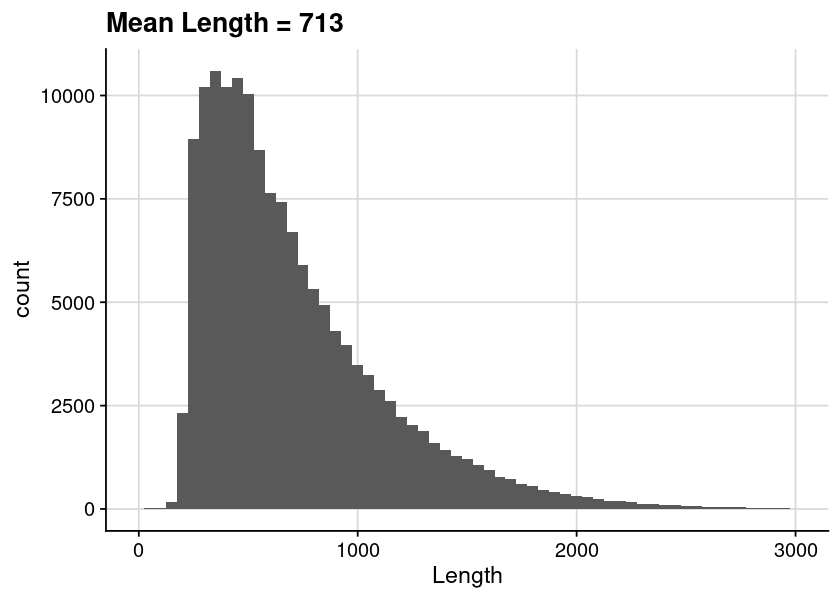

In [10]:
dat = dat_region_nuc_arrange
vec = dat$Length
num = round(mean(vec))
txt = paste("Mean Length", "=", num)

gpt = ggplot(dat, aes(x=Length)) + 
    geom_histogram(binwidth = 50) + 
    xlim(0, 3000) +
    labs(x = "Length", title = txt) +
    theme_cowplot() + 
    background_grid()

options(repr.plot.width=7, repr.plot.height=5)
print(gpt)

In [11]:
dat = dat_region_nuc_arrange
vec = dat$pGC
print(summary(vec))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.2771  0.4651  0.5204  0.5269  0.5843  1.0000 


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


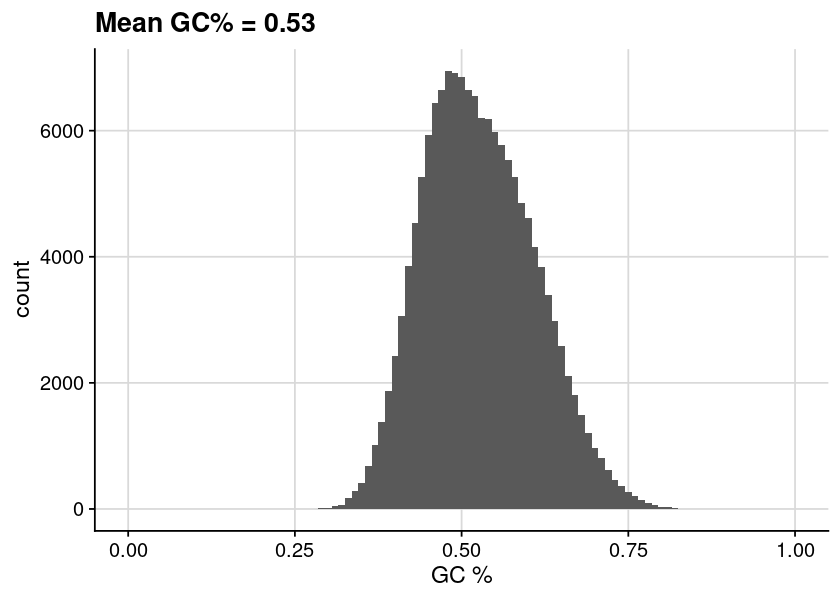

In [12]:
dat = dat_region_nuc_arrange
vec = dat$pGC
num = round(mean(vec), 2)
txt = paste("Mean GC%", "=", num)

gpt = ggplot(dat, aes(x=pGC)) + 
    geom_histogram(binwidth = 0.01) + 
    xlim(0, 1) +
    labs(x = "GC %", title = txt) +
    theme_cowplot() + 
    background_grid()

print(gpt)